# Анализ популярности компьютерных игр, и влияющие на нее факторы.

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


## Изучение данных файла.

In [23]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import stats as st

server_path = '/datasets/games.csv'
filename = 'games.csv'
try:
    data = pd.read_csv(server_path)
except: 
    data = pd.read_csv(filename)
    
print(data.info())
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Описание данных:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта 
ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию:
EC — Early Childhood,

E — Everyone,

K-A - Kids to Adults

E10+ — Everyone 10+

T — Teen

M — Mature

AO — Adults Only

RP — Rating Pending.

### Вывод
В файле содержатся сведения о 16715 играх. Есть пропущенные значения в графах с наименованием игр, жанром, годом выпуска, оценкой критиков и пользователей, рейтингом.

## Обработка данных

In [25]:
data.columns = data.columns.str.lower()
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Привела названия граф к нижнему регистру.

In [26]:
data['year_of_release'] = data['year_of_release'].fillna(99999)
data['year_of_release'] = data['year_of_release'].astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
None


Заполнила маркером 99999 пропуски в данных с годами выпуска, таких пропусков менее 2%, перевела данные в столбце с годом выпуска в целочисленный формат для удобства.

In [27]:
data['user_score'] = data['user_score'].fillna(0)
print(data['user_score'].value_counts())
print(data['critic_score'].value_counts())
print(data['rating'].value_counts())


0      6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.3       2
0.7       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


В столбце с оценкой пользователей есть 2424 оценки tbd - to be determined, т.е. имеется ввиду, что оценка еще не определена, будет определена позднее. В столбцах с оценкой критиков и рейтингом такой аббревиатуры нет.


In [28]:
data['user_score'] = data['user_score'].replace('tbd', '777')
print(data['user_score'].value_counts())
data['user_score'] = pd.to_numeric(data['user_score'], errors='ignore')
print(data.info())

0      6701
777    2424
7.8     324
8       290
8.2     282
       ... 
1.9       2
0.7       2
0.5       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         16715 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


Поменяла данную аббревиатуру в столбце с оценкой пользователя на маркер 777 (раз оценки пока нет), привела данные в столбце в числовой формат.

In [29]:
data['critic_score'] = data['critic_score'].fillna(777)
data['rating'] = data['rating'].fillna(777)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


Пропуски данных с толбцах с оценкой критиков и рейтингом изменила на маркер 777. Заменять пропуски на среднюю (например) считаю некорректным, получится, что мы искусственно завышаем оценку игре, так как скорее всего она не привлекла к себе большого внимания.

In [30]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,777.0,0.0,777
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,777.0,0.0,777
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,777.0,0.0,777
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,777.0,0.0,777


Перевела название игр, платформ, жанр в нижний регистр.

In [31]:
print('Дубликатов:', data.duplicated().sum())

Дубликатов: 0


Дубликатов нет.

In [32]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
print(data.info())
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,777.0,0.0,777,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,777.0,0.0,777,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,777.0,0.0,777,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,777.0,0.0,777,28.31


В графе total_sales вывела суммарные продажи игр во всех регионах.

### Вывод
Поскольку данные собирались из открытых источников, пропуски информации можно объяснить недостатком данных в интернете.

Заполнила нулями пропуски в данных с годами выпуска, таких пропусков менее 2%, перевела данные в столбце с годом выпуска в формат даты.

В столбце с оценкой пользователей есть 2424 оценки tbd - to be determined, т.е. имеется ввиду, что оценка еще не определена, будет определена позднее. Поменяла данную аббревиатуру в столбце с оценкой пользователя на маркер 777 (раз оценки пока нет), привела данные в столбце в числовой формат.

Пропуски данных с толбцах с оценкой критиков и рейтингом изменила на маркер 777. Заменять пропуски на среднюю (например) считаю некорректным, получится, что мы искусственно завышаем оценку игре, так как скорее всего она не привлекла к себе большого внимания.

Есть две строки с пропущенными названиями игр, но поскольку по этим играм есть данные о платформе и продажах, оставляю так, так как сами по себе названия игр нам не нужны.

В графе total_sales вывела суммарные продажи игр во всех регионах.

## Исследовательский анализ данных

### Анализ выпуска игр, определение жизни платформ, актуального периода

In [33]:
release = data.groupby('year_of_release')['name'].count()
print(release)

year_of_release
1980        9
1981       46
1982       36
1983       17
1984       14
1985       14
1986       21
1987       16
1988       15
1989       17
1990       16
1991       41
1992       43
1993       60
1994      121
1995      219
1996      263
1997      289
1998      379
1999      338
2000      350
2001      482
2002      829
2003      775
2004      762
2005      939
2006     1006
2007     1197
2008     1427
2009     1426
2010     1255
2011     1136
2012      653
2013      544
2014      581
2015      606
2016      502
99999     269
Name: name, dtype: int64


Пик выпуска игр пришелся на 2006 - 2011 годы, когда выпускалось более одной тысячи игр в год, затем количество ежегодно выпускаемых игр резко снизилось практически до уровня 2001 года. С 2012 количество выпускаемых игр держится примерно на одном уровне, 2016 не должен сильно выбиваться из ряда, с учетом того, что данные за этот год у нас неполные.

In [34]:
platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
print(platform)

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
3ds      259.00
xb       257.74
gb       255.46
nes      251.05
n64      218.68
snes     200.04
gc       198.93
xone     159.32
2600      96.98
wiiu      82.19
psv       54.07
sat       33.59
gen       30.77
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: total_sales, dtype: float64


Платформы с наибольшими суммарными продажами: ps2, x360, ps3, wii, ds, ps.

In [35]:
platform_big = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
platform_top = data.query('platform in @platform_big').pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').reset_index()
display(platform_top)


platform,year_of_release,ds,ps,ps2,ps3,wii,x360
0,1985,0.02,NaN,NaN,NaN,NaN,NaN
1,1994,NaN,6.03,NaN,NaN,NaN,NaN
2,1995,NaN,35.96,NaN,NaN,NaN,NaN
3,1996,NaN,94.70,NaN,NaN,NaN,NaN
4,1997,NaN,136.17,NaN,NaN,NaN,NaN
5,1998,NaN,169.49,NaN,NaN,NaN,NaN
6,1999,NaN,144.53,NaN,NaN,NaN,NaN
7,2000,NaN,96.37,39.17,NaN,NaN,NaN
8,2001,NaN,35.59,166.43,NaN,NaN,NaN
9,2002,NaN,6.67,205.38,NaN,NaN,NaN


Сгруппировала данные в части глобальных продаж по годам выпуска игр и платформам.

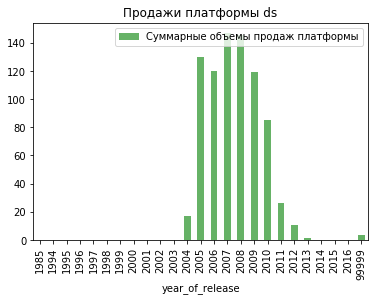

In [36]:
platform_top.plot(x='year_of_release', y = 'ds', kind='bar', title = 'Продажи платформы ds',
                 color='green', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

Пик продаж платформы ds приходится на 2005 - 2010 годы. Срок жизни платформы 9-10 лет.

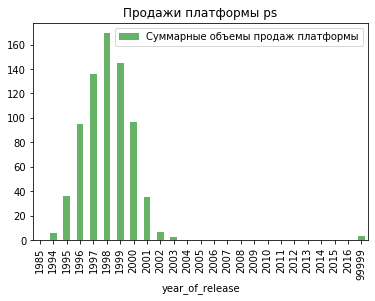

In [37]:
platform_top.plot(x='year_of_release', y = 'ps', kind='bar', title = 'Продажи платформы ps',
                 color='green', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

Пик продаж платформы ps приходится на 1996 - 2000 годы. Срок жизни платформы 9-10 лет.

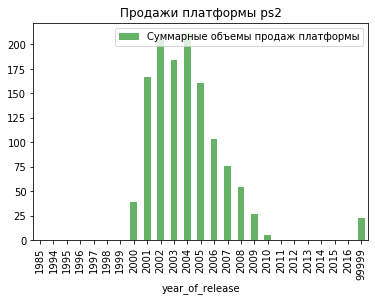

In [38]:
platform_top.plot(x='year_of_release', y = 'ps2', kind='bar', title = 'Продажи платформы ps2',
                 color='green', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

Пик продаж платформы ps2 приходится на 2001 - 2006 годы. Срок жизни платформы 10 - 11 лет.

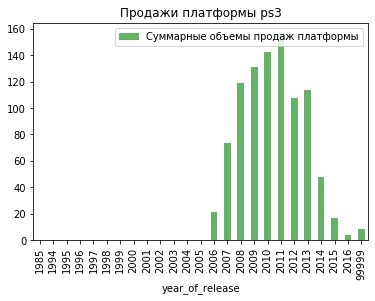

In [39]:
platform_top.plot(x='year_of_release', y = 'ps3', kind='bar', title = 'Продажи платформы ps3',
                 color='green', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

Пик продаж платформы ps3 приходится на 2008 - 2013 годы. Срок жизни платформы 10-11 лет.

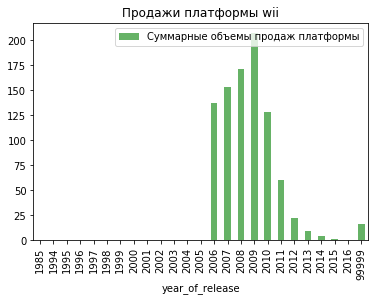

In [40]:
platform_top.plot(x='year_of_release', y = 'wii', kind='bar', title = 'Продажи платформы wii',
                 color='green', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

Пик продаж платформы wii приходится на 2006 - 2010 годы. Срок жизни платформы 8-10 лет.

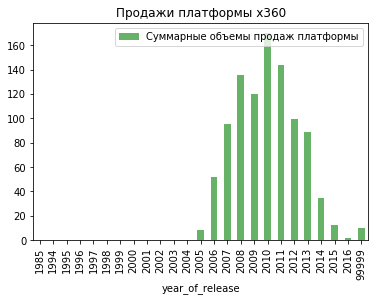

In [41]:
platform_top.plot(x='year_of_release', y = 'x360', kind='bar', title = 'Продажи платформы x360',
                 color='green', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

Пик продаж платформы x360 приходится на 2007 - 2013 годы. Срок жизни платформы 11-12 лет.

#### Вывод
Срок жизни платформы 8-12 лет, пик продаж приходится на средние 5-6 лет, дальше идет затухание, начинают появляться и развиваться новые платформы.

Для прогноза на 2017 год предлагаю за актуальный период взять с 2012 года, чтобы отследить намечающийся на 2017 год рост и спад платформ. 

### Анализ данных за актуальный период

In [43]:
data_actual = data.query('2012 <= year_of_release < 99999').reset_index(drop=True)
print(data_actual.info())
display(data_actual.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null int64
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       2886 non-null float64
user_score         2886 non-null float64
rating             2886 non-null object
total_sales        2886 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 270.7+ KB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,777.0,0.0,777,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,777.0,0.0,777,14.60
4,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
5,call of duty: black ops ii,x360,2012,shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
6,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
7,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,777.0,0.0,777,11.68
8,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
9,new super mario bros. 2,3ds,2012,platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


Сделала срез данных за актуальный период.

In [44]:
platform_actual = data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
print(platform_actual)


platform
ps4     314.14
ps3     288.79
x360    236.54
3ds     194.61
xone    159.32
wiiu     82.19
pc       62.65
psv      49.18
wii      35.37
ds       12.55
psp      11.19
Name: total_sales, dtype: float64


Платформы с наибольшими суммарными продажами за актуальный период: ps4, ps3, x360, 3ds, xone.

In [45]:
platform_big_actual = ['ps4', 'ps3', 'x360', '3ds', 'xone', 'wiiu']
platform_top_actual = data_actual.query('platform in @platform_big_actual').pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').reset_index()
display(platform_top_actual)


platform,year_of_release,3ds,ps3,ps4,wiiu,x360,xone
0,2012,51.36,107.36,NaN,17.56,99.74,NaN
1,2013,56.57,113.25,25.99,21.65,88.58,18.96
2,2014,43.76,47.76,100.00,22.03,34.74,54.07
3,2015,27.78,16.82,118.90,16.35,11.96,60.14
4,2016,15.14,3.60,69.25,4.60,1.52,26.15


Сгруппировала данные по платформам с наибольшими суммарными продажами за актуальный период.

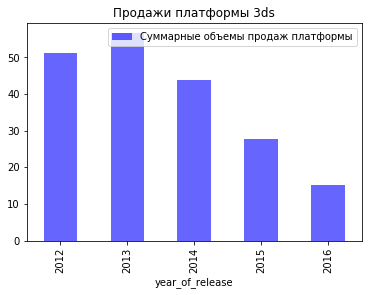

In [47]:
platform_top_actual.plot(x='year_of_release', y = '3ds', kind='bar', title = 'Продажи платформы 3ds',
                 color='blue', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

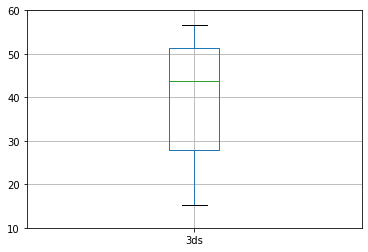

count     5.000000
mean     38.922000
std      17.170394
min      15.140000
25%      27.780000
50%      43.760000
75%      51.360000
max      56.570000
Name: 3ds, dtype: float64


In [48]:
plt.ylim(10, 60)
platform_top_actual.boxplot(column='3ds')
plt.show()
print(platform_top_actual['3ds'].describe()) 

Продажа игр на платформе 3ds снижается начиная с 2014 года. Медиана продаж игр на платформе 3ds составляет 43.76 миллиона копий, среднее 38.92. Минимальное количество копий игр на данной платформе за актуальный период было продано в 2016 году, максимальное - в 2013.

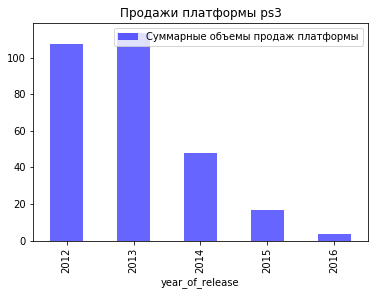

In [50]:
platform_top_actual.plot(x='year_of_release', y = 'ps3', kind='bar', title = 'Продажи платформы ps3',
                 color='blue', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

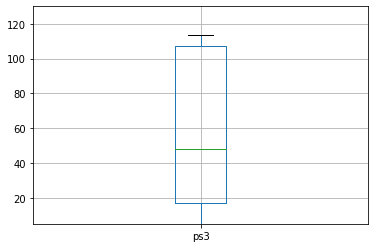

count      5.000000
mean      57.758000
std       50.617905
min        3.600000
25%       16.820000
50%       47.760000
75%      107.360000
max      113.250000
Name: ps3, dtype: float64


In [51]:
plt.ylim(5, 130)
platform_top_actual.boxplot(column='ps3')
plt.show()
print(platform_top_actual['ps3'].describe()) 

Продажа игр на платформе ps3 также снижается начиная с 2014 года. Медиана продаж игр на платформе ps3 составляет 47.76 миллиона копий, среднее 57.75. Минимальное количество копий игр на данной платформе за актуальный период было продано в 2016 году, максимальное - в 2012.

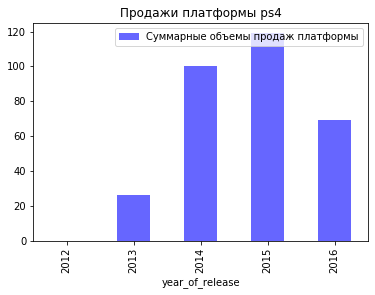

In [52]:
platform_top_actual.plot(x='year_of_release', y = 'ps4', kind='bar', title = 'Продажи платформы ps4',
                 color='blue', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

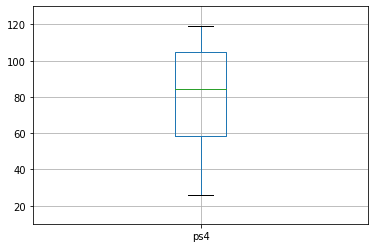

count      4.000000
mean      78.535000
std       40.567917
min       25.990000
25%       58.435000
50%       84.625000
75%      104.725000
max      118.900000
Name: ps4, dtype: float64


In [53]:
plt.ylim(10, 130)
platform_top_actual.boxplot(column='ps4')
plt.show()
print(platform_top_actual['ps4'].describe()) 

Продажа игр на платформе ps4 весь актуальный период уверенно растет за исключением 2016 года.
Медиана продаж игр на платформе ps4 составляет 84.62 миллиона копий, среднее 78.53. Минимальное количество копий игр на данной платформе за актуальный период было продано в 2013 году, максимальное - в 2015.

Исходя из описания данные за 2016 год могут быть неполные, тогда можно предположить, что в 2016 году продажа игр на платформе ps4 также будет расти.

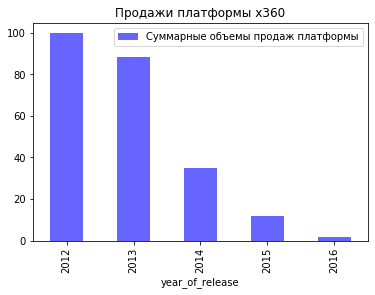

In [55]:
platform_top_actual.plot(x='year_of_release', y = 'x360', kind='bar', title = 'Продажи платформы x360',
                 color='blue', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

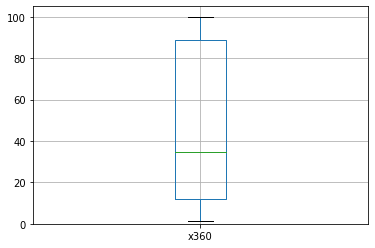

count     5.000000
mean     47.308000
std      44.599522
min       1.520000
25%      11.960000
50%      34.740000
75%      88.580000
max      99.740000
Name: x360, dtype: float64


In [56]:
plt.ylim(0, 105)
platform_top_actual.boxplot(column='x360')
plt.show()
print(platform_top_actual['x360'].describe()) 

Продажа игр на платформе x360 весь актуальный период снижается. Медиана продаж игр на платформе x360 составляет 34.74 миллиона копий, среднее 47.30. Минимальное количество копий игр на данной платформе за актуальный период было продано в 2016 году, максимальное - в 2012.

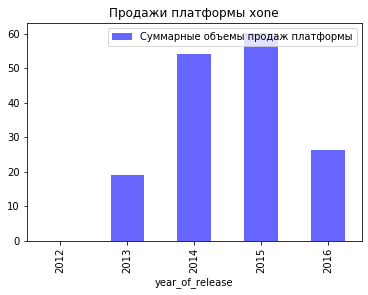

In [58]:
platform_top_actual.plot(x='year_of_release', y = 'xone', kind='bar', title = 'Продажи платформы xone',
                 color='blue', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

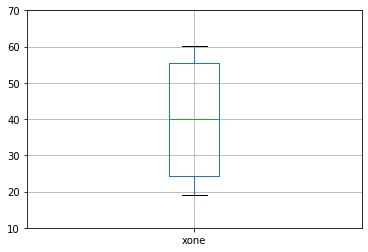

count     4.000000
mean     39.830000
std      20.313977
min      18.960000
25%      24.352500
50%      40.110000
75%      55.587500
max      60.140000
Name: xone, dtype: float64


In [59]:
plt.ylim(10, 70)
platform_top_actual.boxplot(column='xone')
plt.show()
print(platform_top_actual['xone'].describe()) 

Продажа игр на платформе xone весь актуальный период уверенно растет за исключением 2016 года.
Медиана продаж игр на платформе xone составляет 40.11 миллиона копий, среднее 39.83. Минимальное количество копий игр на данной платформе за актуальный период было продано в 2013 году, максимальное - в 2015.

Исходя из описания данные за 2016 год могут быть неполные, тогда можно предположить, что в 2016 году продажа игр на платформе xone также будет расти.

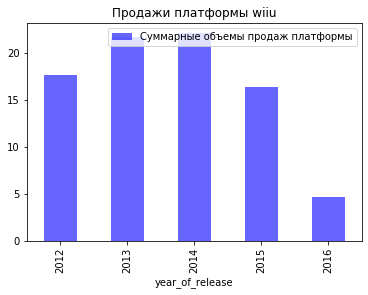

In [60]:
platform_top_actual.plot(x='year_of_release', y = 'wiiu', kind='bar', title = 'Продажи платформы wiiu',
                 color='blue', alpha=0.6, label='Суммарные объемы продаж платформы')
plt.show()

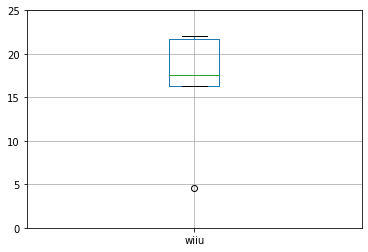

count     5.000000
mean     16.438000
std       7.068244
min       4.600000
25%      16.350000
50%      17.560000
75%      21.650000
max      22.030000
Name: wiiu, dtype: float64


In [61]:
plt.ylim(0, 25)
platform_top_actual.boxplot(column='wiiu')
plt.show()
print(platform_top_actual['wiiu'].describe()) 

Продажа игр на платформе wiiu с 2015 года снижается, хотя за 2016 год данные неполные, но объем продаж игр на данной платформе в целом за актуальный период мал.

#### Вывод
Продажи игр на платформах ps3, x360, 3ds снижаются весь актуальный период.

Рост показывают продажи игр на платформах ps4 и xone, причем по данным за 2015 (последний полный год) продажи на платформе ps4 в два раза превышали продажи на платформе xone.

Платформа ps4 также является лидером продаж в актуальном периоде в целом.

###  Анализ влияния отзывов пользователей и критиков на продажи игр, анализ продаж игр по жанрам

In [62]:
data_actual_platform = data_actual.query('platform in @platform_big_actual').reset_index(drop=True)
print(data_actual_platform.info())
display(data_actual_platform.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 12 columns):
name               1967 non-null object
platform           1967 non-null object
year_of_release    1967 non-null int64
genre              1967 non-null object
na_sales           1967 non-null float64
eu_sales           1967 non-null float64
jp_sales           1967 non-null float64
other_sales        1967 non-null float64
critic_score       1967 non-null float64
user_score         1967 non-null float64
rating             1967 non-null object
total_sales        1967 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 184.5+ KB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,777.0,0.0,777,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,777.0,0.0,777,14.60
4,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Сделала срез по платформам с наибольшими суммарными продажами за актуальный период.

In [63]:
ps4 = 'ps4'
data_actual_ps4 = data_actual.query('platform in @ps4 and critic_score != 777 and user_score !=777').reset_index(drop=True)
print(data_actual_ps4.info())
display(data_actual_ps4.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
name               250 non-null object
platform           250 non-null object
year_of_release    250 non-null int64
genre              250 non-null object
na_sales           250 non-null float64
eu_sales           250 non-null float64
jp_sales           250 non-null float64
other_sales        250 non-null float64
critic_score       250 non-null float64
user_score         250 non-null float64
rating             250 non-null object
total_sales        250 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 23.6+ KB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
3,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Сделала срез по платформе ps4 с исключением маркеров в оценках критиков и пользователей.

Коэффициент корреляции продаж игр на платформе ps4 от отзывов критиков составляет 0.41


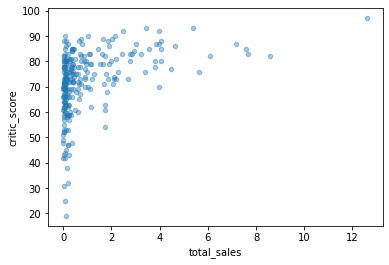

In [64]:
data_actual_ps4.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.4) 
print('Коэффициент корреляции продаж игр на платформе ps4 от отзывов критиков составляет {:.2f}'.format(data_actual_ps4['total_sales'].corr(data_actual_ps4['critic_score'])))

Коэффициент зависимости продаж игр на платформе ps4 от отзывов пользователей составляет -0.02


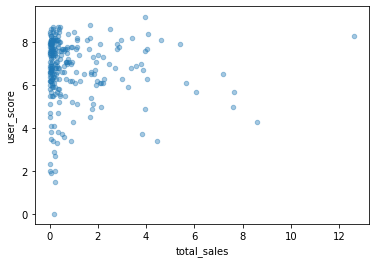

In [65]:
data_actual_ps4.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.4) 
print('Коэффициент зависимости продаж игр на платформе ps4 от отзывов пользователей составляет {:.2f}'.format(data_actual_ps4['total_sales'].corr(data_actual_ps4['user_score'])))


Для платформы ps4, как самой популярной в актуальный период, объем продаж слабо зависит от отзывов критиков (коэффициент корреляции 0.41) и совсем не зависит от отзывов других пользователей (коэффициент корреляции -0.02).

Можно сказать, что пользователи игр на платформе ps4 играют в то, что нравится именно им.

Проверю, распространяется ли это утверждение на остальные платформы.

In [66]:
xone = 'xone'
data_actual_xone = data_actual.query('platform in @xone and critic_score != 777 and user_score !=777').reset_index(drop=True)
print(data_actual_xone.info())
display(data_actual_xone.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 12 columns):
name               166 non-null object
platform           166 non-null object
year_of_release    166 non-null int64
genre              166 non-null object
na_sales           166 non-null float64
eu_sales           166 non-null float64
jp_sales           166 non-null float64
other_sales        166 non-null float64
critic_score       166 non-null float64
user_score         166 non-null float64
rating             166 non-null object
total_sales        166 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 15.7+ KB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1,call of duty: advanced warfare,xone,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
2,halo 5: guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
3,fallout 4,xone,2015,role-playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
4,assassin's creed: unity,xone,2014,action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


Сделала срез по платформе xone с исключением маркеров в оценках критиков и пользователей.

Коэффициент корреляции продаж игр на платформе xone от отзывов критиков составляет 0.41


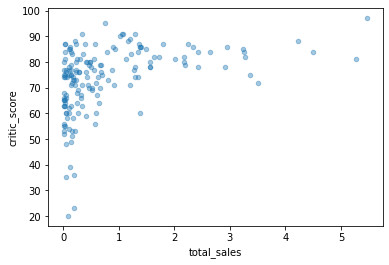

In [67]:
data_actual_xone.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.4) 
print('Коэффициент корреляции продаж игр на платформе xone от отзывов критиков составляет {:.2f}'.format(data_actual_xone['total_sales'].corr(data_actual_xone['critic_score'])))

Коэффициент корреляции продаж игр на платформе xone от отзывов пользователей составляет -0.07


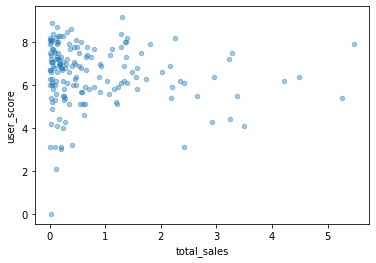

In [68]:
data_actual_xone.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.4) 
print('Коэффициент корреляции продаж игр на платформе xone от отзывов пользователей составляет {:.2f}'.format(data_actual_xone['total_sales'].corr(data_actual_xone['user_score'])))


Зависимость продаж для платформы xone от отзывов критиков и пользователей практически совпадает с зависимостью для платформы ps4. То есть для растущих платформ зависимость от отзывов (или ее отсутствие) одинаково.

Коэффициент корреляции от отзывов критиков составляет 0.41, коэффициент корреляции от отзывов пользователей составляет -0.07.

Коэффициент корреляции продаж игр на платформе ps3 от отзывов критиков составляет 0.33


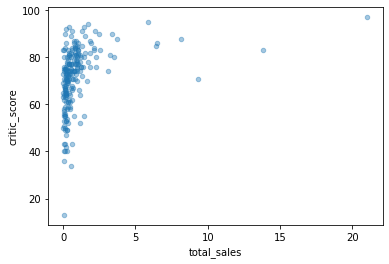

In [69]:
ps3 = 'ps3'
data_actual_ps3 = data_actual.query('platform in @ps3 and critic_score != 777 and user_score !=777').reset_index(drop=True)
data_actual_ps3.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.4) 
print('Коэффициент корреляции продаж игр на платформе ps3 от отзывов критиков составляет {:.2f}'.format(data_actual_ps3['total_sales'].corr(data_actual_ps3['critic_score'])))


Сделала срез по платформе ps3 с исключением маркеров в оценках критиков и пользователей.

Коэффициент корреляции продаж игр на платформе ps3 от отзывов пользователей составляет 0.00


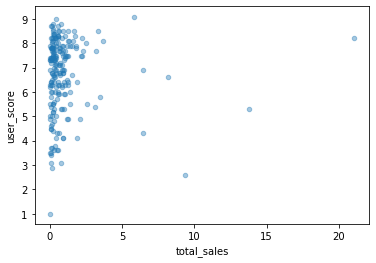

In [70]:
data_actual_ps3.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.4) 
print('Коэффициент корреляции продаж игр на платформе ps3 от отзывов пользователей составляет {:.2f}'.format(data_actual_ps3['total_sales'].corr(data_actual_ps3['user_score'])))


Для платформы ps3 зависимость продаж от отзывов критиков еще ниже - коэффициент составляет 0.33, а зависимость от отзывов пользователей отсутствует, коэффициент - 0.00.

Коэффициент корреляции продаж игр на платформе 3ds от отзывов критиков составляет 0.31


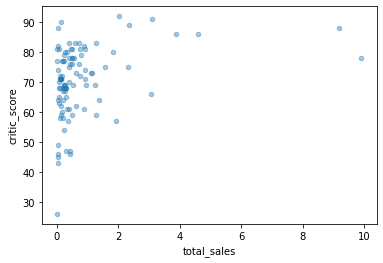

In [71]:
_3ds = '3ds'
data_actual_3ds = data_actual.query('platform in @_3ds and critic_score != 777 and user_score !=777').reset_index(drop=True)
data_actual_3ds.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.4) 
print('Коэффициент корреляции продаж игр на платформе 3ds от отзывов критиков составляет {:.2f}'.format(data_actual_3ds['total_sales'].corr(data_actual_3ds['critic_score'])))


Сделала срез по платформе 3ds с исключением маркеров в оценках критиков и пользователей.

Коэффициент корреляции продаж игр на платформе 3ds от отзывов пользователей составляет 0.20


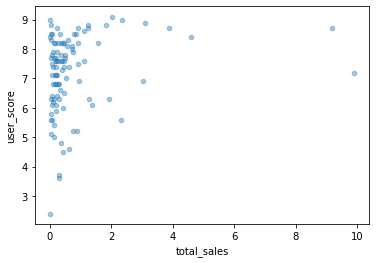

In [72]:
data_actual_3ds.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.4) 
print('Коэффициент корреляции продаж игр на платформе 3ds от отзывов пользователей составляет {:.2f}'.format(data_actual_3ds['total_sales'].corr(data_actual_3ds['user_score'])))


Для платформы 3ds коэффициент корреляции продаж от отзывов критиков составляет 0.31, а коэффициент корреляции продаж от отзывов пользователей составляет 0.20.

Коэффициент корреляции продаж игр на платформе x360 от отзывов критиков составляет 0.36


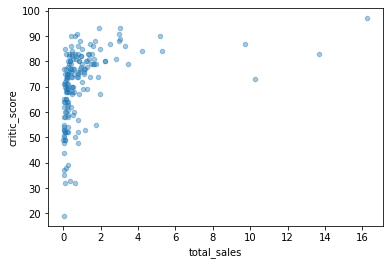

In [73]:
x360 = 'x360'
data_actual_x360 = data_actual.query('platform in @x360 and critic_score != 777 and user_score !=777').reset_index(drop=True)
data_actual_x360.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.4) 
print('Коэффициент корреляции продаж игр на платформе x360 от отзывов критиков составляет {:.2f}'.format(data_actual_x360['total_sales'].corr(data_actual_x360['critic_score'])))


Коэффициент корреляции продаж игр на платформе x360 от отзывов пользователей составляет -0.00


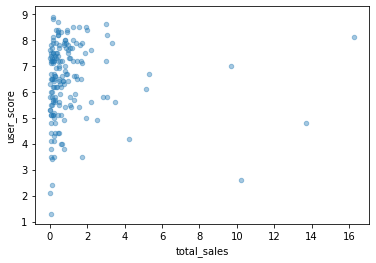

In [74]:
data_actual_x360.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.4) 
print('Коэффициент корреляции продаж игр на платформе x360 от отзывов пользователей составляет {:.2f}'.format(data_actual_x360['total_sales'].corr(data_actual_x360['user_score'])))

Для платформы x360 коэффициент зависимости продаж от отзывов критиков составляет 0.36, а коэффициент зависимости продаж от отзывов пользователей составляет -0.00.

Коэффициент корреляции продаж игр на платформе wiiu от отзывов критиков составляет 0.35


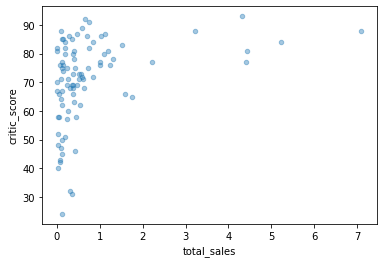

In [75]:
wiiu = 'wiiu'
data_actual_wiiu = data_actual.query('platform in @wiiu and critic_score != 777 and user_score !=777').reset_index(drop=True)
data_actual_wiiu.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.4) 
print('Коэффициент корреляции продаж игр на платформе wiiu от отзывов критиков составляет {:.2f}'.format(data_actual_wiiu['total_sales'].corr(data_actual_wiiu['critic_score'])))


Коэффициент корреляции продаж игр на платформе wiiu от отзывов пользователей составляет 0.39


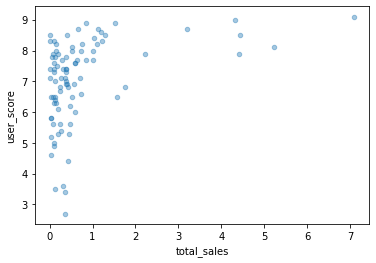

In [76]:
data_actual_wiiu.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.4) 
print('Коэффициент корреляции продаж игр на платформе wiiu от отзывов пользователей составляет {:.2f}'.format(data_actual_wiiu['total_sales'].corr(data_actual_wiiu['user_score'])))

А вот для платформы wiiu коэффициент корреляции продаж от отзывов критиков и от отзывов пользователей практически совпадает: 0.35 и 0.39 соответственно, но даже в этом случае зависимость небольшая.

#### Вывод
Для растущих платформ (ps4, xone) коэффициент корреляции продаж от отзывов критиков составляет 0.41, коэффициент корреляции от отзывов пользователей отрицательный и несущественный.

Для затухающих платформ коэффициент корреляции продаж от отзывов критиков менее существенный, коэффициент корреляции от отзывов пользователей также близок к нулю (кроме платформы wiiu).

### Анализ игр по жанрам

In [78]:
data_actual_genre = data_actual_platform.pivot_table(index='genre', values='total_sales',aggfunc='sum').sort_values(by = 'total_sales',
ascending = False).reset_index()
print(data_actual_genre)    
print('Среднее число продаж в целом:', data_actual_genre['total_sales'].mean())
data_actual_platform.pivot_table(index='genre', values='total_sales',aggfunc='mean').sort_values(by = 'total_sales',
ascending = False)


           genre  total_sales
0         action       395.32
1        shooter       288.12
2         sports       170.97
3   role-playing       154.15
4           misc        61.24
5       platform        55.66
6         racing        50.05
7       fighting        41.80
8     simulation        25.36
9      adventure        22.85
10      strategy         6.03
11        puzzle         4.04
Среднее число продаж в целом: 106.29916666666647


,total_sales
genre,
shooter,1.516421
sports,0.810284
platform,0.795143
role-playing,0.682080
racing,0.588824
action,0.548294
simulation,0.507200
fighting,0.475000
misc,0.443768


#### Вывод
Самые популярные жанры - экшен, стрелялки, спортивные соревнования и ролевые игры, продажи этих игр превышают среднее число продаж за актуальный период в целом. На последних местах по продажам идут стратегии и головоломки. При этом в среднем на одну игру самое большое количество продаж у шутеров (с большим отрывом от остальных игр).

Можно предположить, что пользователям не хватает активности (пусть и искусственной) и адреналина, и не очень хочется много думать в процессе игры.

## Портрет пользователя каждого региона

In [79]:
display(data_actual_platform.head())
print(data_actual_platform.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,777.0,0.0,777,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,777.0,0.0,777,14.60
4,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 12 columns):
name               1967 non-null object
platform           1967 non-null object
year_of_release    1967 non-null int64
genre              1967 non-null object
na_sales           1967 non-null float64
eu_sales           1967 non-null float64
jp_sales           1967 non-null float64
other_sales        1967 non-null float64
critic_score       1967 non-null float64
user_score         1967 non-null float64
rating             1967 non-null object
total_sales        1967 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 184.5+ KB
None


In [80]:
print(data_actual_platform['rating'].value_counts())

777     735
M       375
E       307
T       304
E10+    246
Name: rating, dtype: int64


Из 1967 игр актуальной выборки 735 не имеют рейтинга ESRB, у 375 рейтинг M "Для взрослых", у 307 рейтинг E "Для всех", у 304 рейтинг T "Подросткам", у 246 рейтинг E10+ "Для всех от 10 лет и старше".

In [81]:
def rating_cat(row): 
    rating = row['rating']
    if rating == 'E':
        return '1'
    if rating == 'E10+':
        return '2'
    if rating == 'T':
        return '3'
    if rating == 'M':
        return '4'
    else:
        return '0'
    
data_actual_platform['rating_category'] = data_actual_platform.apply(rating_cat, axis = 1)
data_actual_platform['rating_category'].value_counts()
data_actual_platform['rating_category'] = data_actual_platform['rating_category'].astype(int)
print(data_actual_platform.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 13 columns):
name               1967 non-null object
platform           1967 non-null object
year_of_release    1967 non-null int64
genre              1967 non-null object
na_sales           1967 non-null float64
eu_sales           1967 non-null float64
jp_sales           1967 non-null float64
other_sales        1967 non-null float64
critic_score       1967 non-null float64
user_score         1967 non-null float64
rating             1967 non-null object
total_sales        1967 non-null float64
rating_category    1967 non-null int64
dtypes: float64(7), int64(2), object(4)
memory usage: 199.9+ KB
None


Для дальнейшего определения зависимости продаж от рейтинга провела категоризацию рейтингов: E - категория 1, E10+ - категория 2, T - категория 3, M - категория 4, без рейтинга - категория 0. То есть чем старше возраст, для которого предназначена игра, тем выше категория. Перевела столбец в целочисленный формат.

### Северная Америка

In [82]:
data_platf_na = data_actual_platform.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
display(data_platf_na)

,na_sales
platform,
x360,140.05
ps4,108.74
ps3,103.38
xone,93.12
3ds,55.31
wiiu,38.10


Сгруппировала по платформам продажи в Северной Америке.

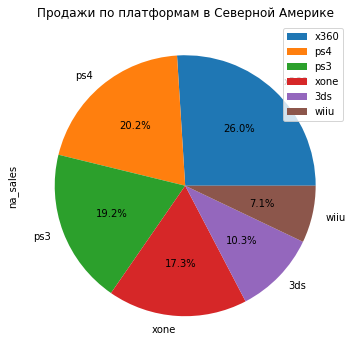

In [83]:
data_platf_na.plot(title = 'Продажи по платформам в Северной Америке', y='na_sales', kind='pie', autopct='%1.1f%%', figsize=(6, 6))

На первом месте по продажам в Северной Америке в актуальном периоде находится платформа x360 - 26% рынка, на втором ps4 - 20.2% рынка, на третьем не сдает позиции ps3 - 19.2% (почти столько же, сколько у платформы следующей версии), на четвертом находится xone с 17.3% рынка, на пятом 3ds - 10.3%.

In [84]:
data_user_na = data_actual_platform.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
display(data_user_na)

,na_sales
genre,
action,163.16
shooter,138.87
sports,79.15
role-playing,52.87
misc,28.36
platform,23.32
fighting,18.93
racing,16.45
adventure,8.26


Сгруппировала по жанрам продажи в Северной Америке.

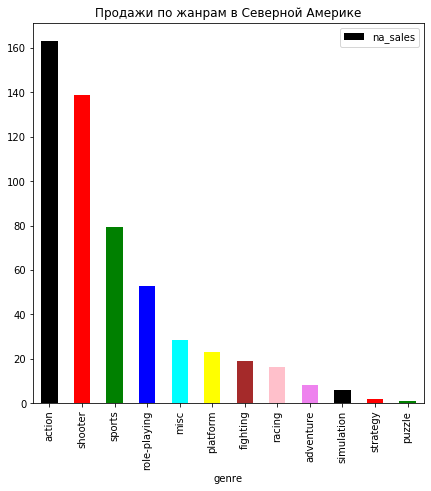

In [86]:
data_user_na.plot(title = 'Продажи по жанрам в Северной Америке', y='na_sales', kind='bar',
                  color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'brown', 'pink',
                         'violet'], figsize=(7, 7))
plt.show()

Среди жанров первое место по подажам в Северной Америке занимает action - 30.3%, второе у shooter - 25.8%, третье место у sports - 14.7%, четвертое у role-playing - 9.8%, пятое у platform - 4.3%.

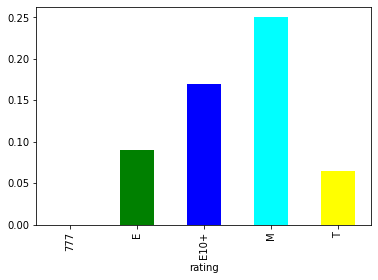

In [88]:
data_actual_platform.groupby('rating')['na_sales'].median().plot(y='rating_category', kind='bar',
                                                                 color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.show()

#### Вывод

На первом месте по продажам в Северной Америке в актуальном периоде находится платформа x360 - 26% рынка - поддержка местного производителя- (опережая по продажам следующую версию), на втором ps4 - 20.2% рынка, на третьем не сдает позиции ps3 - 19.2% (почти столько же, сколько у платформы следующей версии), на четвертом находится xone с 17.3% рынка, на пятом 3ds - 10.3%.

Среди жанров первое место по подажам в Северной Америке занимает action - 30.3%, второе у shooter - 25.8%, третье место у sports - 14.7%, четвертое у role-playing - 9.8%, пятое у platform - 4.3%.

В Северной Америке игры без рейтинга ESRB не продаются (или не покупаются?), зависимости продаж от рейтинга практически нет, но можно сказать, что популярностью пользуются игры для возраста 10+ и игры для взрослых, но без излишней жестокости/откровенности.


### Европа

In [89]:
data_platf_eu = data_actual_platform.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
display(data_platf_eu)

,eu_sales
platform,
ps4,141.09
ps3,106.86
x360,74.52
xone,51.59
3ds,42.64
wiiu,25.13


Сгруппировала по платформам продажи в Европе.

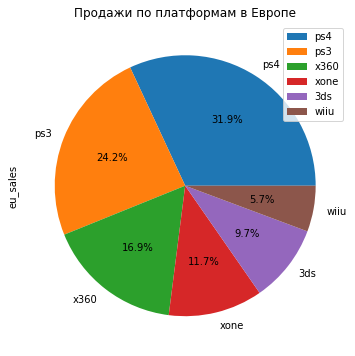

In [91]:
data_platf_eu.plot(title = 'Продажи по платформам в Европе', y='eu_sales', kind='pie',
                   autopct='%1.1f%%', figsize=(6, 6))
plt.show()

На первом месте по продажам в Европе в актуальном периоде находится платформа ps4 - 31.9% рынка, на втором ps3 - 24.2% рынка, на третьем x360 - 16.9%, на четвертом находится xone с 11.7% рынка, на пятом 3ds - 9.7%.

In [92]:
data_user_eu = data_actual_platform.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
display(data_user_eu)

,eu_sales
genre,
action,143.25
shooter,104.62
sports,64.22
role-playing,38.81
racing,25.23
platform,18.91
misc,18.12
fighting,10.26
adventure,7.92


Сгруппировала по жанрам продажи в Европе.

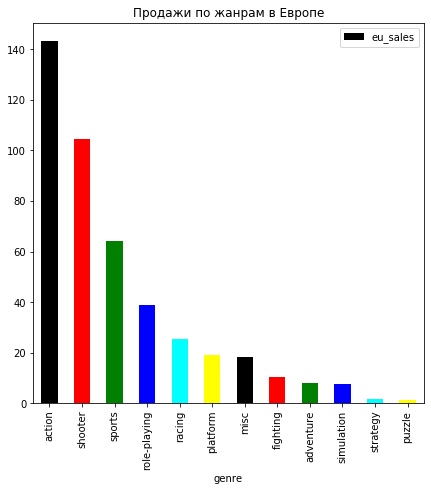

In [93]:
data_user_eu.plot(title = 'Продажи по жанрам в Европе', y='eu_sales', kind='bar',
                  color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'], figsize=(7, 7))
plt.show()

Среди жанров первое место по подажам в Европе занимает action - 32.4%, второе у shooter - 23.7%, третье место у sports - 14.5%, четвертое у role-playing - 8.8%, пятое у racing - 5.7%.

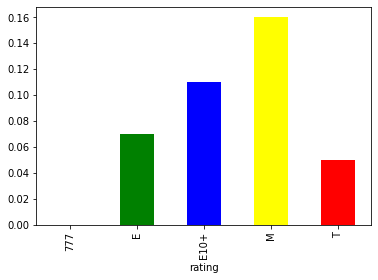

In [94]:
data_actual_platform.groupby('rating')['eu_sales'].median().plot(y='rating_category', kind='bar', color=['red', 'green', 'blue', 'yellow'])
plt.show()

#### Вывод

На первом месте по продажам в Европе в актуальном периоде находится платформа ps4 - 31.9% рынка, на втором ps3 - 24.2% рынка, на третьем x360 - 16.9%, на четвертом находится xone с 11.7% рынка, на пятом 3ds - 9.7%.

Среди жанров первое место по подажам в Европе занимает action - 32.4%, второе у shooter - 23.7%, третье место у sports - 14.5%, четвертое у role-playing - 8.8%, пятое у racing - 5.7%.

В Европе игры без рейтинга ESRB не продаются (или не покупаются?), зависимости продаж от рейтинга практически нет, но можно сказать, что популярностью пользуются игры для возраста 10+ и для взрослых, но без излишней жестокости/откровенности.

### Япония

In [95]:
data_plarf_jp = data_actual_platform.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
display(data_plarf_jp)

,jp_sales
platform,
3ds,87.79
ps3,35.29
ps4,15.96
wiiu,13.01
x360,1.57
xone,0.34


Сгруппировала по платформам продажи в Японии.

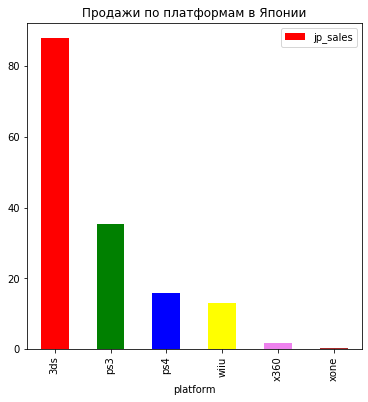

In [96]:
data_plarf_jp.plot(title = 'Продажи по платформам в Японии', y='jp_sales', kind='bar',
                   color=['red', 'green', 'blue', 'yellow', 'violet', 'brown'], figsize=(6, 6))
plt.show()

В актуальном периоде в Японии безоговорочно лидирует платформа 3ds - 57% рынка, на втором ps3 - 22.9% рынка, на третьем ps4 - 10.4%, на четвертом находится wiiu с 8.5% рынка, на пятом x360 - 1.57%.

In [97]:
data_user_jp = data_actual_platform.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
display(data_user_jp)

,jp_sales
genre,
role-playing,50.38
action,42.04
simulation,10.23
shooter,9.12
misc,9.06
platform,8.57
fighting,8.42
sports,6.13
adventure,4.28


Сгруппировала по жанрам продажи в Японии.

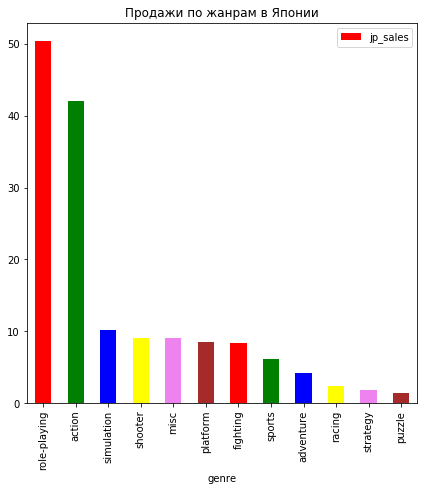

In [98]:
data_user_jp.plot(title = 'Продажи по жанрам в Японии', y='jp_sales', kind='bar',
                  color=['red', 'green', 'blue', 'yellow', 'violet', 'brown'], figsize=(7, 7))
plt.show()

Среди жанров первое место по подажам в Японии занимает role-playing - 32.7%, второе у action - 27.3%, третье место у simulation - 6.6%, четвертое у shooter - 5.9%, пятое у platform - 5.6%.

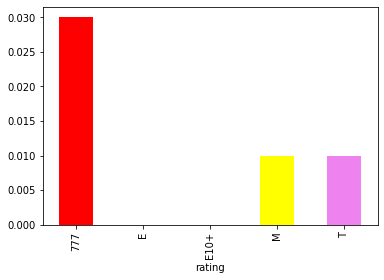

In [99]:
data_actual_platform.groupby('rating')['jp_sales'].median().plot(y='rating_category', kind='bar',
                                                                 color=['red', 'green', 'blue', 'yellow', 'violet'])
plt.show()

#### Вывод
В актуальном периоде в Японии безоговорочно лидирует платформа 3ds - 57% рынка, на втором ps3 - 22.9% рынка, на третьем ps4 - 10.4%, на четвертом находится wiiu с 8.5% рынка, на пятом x360 - 1.57%.

Среди жанров первое место по подажам в Японии занимает role-playing - 32.7%, второе у action - 27.3%, третье место у simulation - 6.6%, четвертое у shooter - 5.9%, пятое у platform - 5.6%

Продажи в Японии не зависят от рейтинга ESRB, в продажах лидируют игры без рейтинга, поскольку ESRB это американский рейтинг, то за пределами США на него не очень обращают внимание, или японские  игры реже получают такие рейтинги, если не предполагается их продвижение на западе.

### Вывод

В части продаж по платформам в Северной Америке и особенно в Японии заметны проявления "патриотизма".

В Америке на долю платформ Microsoft приходится 43.3% рынка, и еще 39.4% на долю Sony.  

В актуальном периоде в Японии на долю японских платформ приходится практически 98.0% рынка.

На первом месте по продажам в Европе в актуальном периоде находится платформа ps4 - 31.9% рынка, на втором ps3 - 24.2% рынка, на третьем x360 - 16.9%, на четвертом находится xone с 11.7% рынка, на пятом 3ds - 9.7% (европейских производителей платформ нет).

Для Старого и Нового Света ТОП-4 жанров совпадает: action, shooter, sports, role-playing. Нехватка активности и адреналина. 

Помимо адреналина и активности (action на втором месте, shooter на четвертом, platform на пятом), Япония также отдает предпочтения более вдумчивым и созерцательным жанрам: role-playing и simulation.

Во всех трех регионах зависимость продаж от рейтинга слабая, но если в Европе и в Северной Америке игры без рейтинга ESRB не продаются, то в Японии они занимают большую часть рынка в актуальном периоде.

## Пользовательские рейтинги

### Xbox One или PS4?

Нулевая гипотеза: средние пользовательские рейтинги платформы Xbox One не отличаются от средних пользовательских рейтингов платформы PS4.

Альтернативная гипотеза: средние пользовательские рейтинги платформы Xbox One отличаются от средних пользовательских рейтингов платформы PS4.

В качестве критерия уровня проверки гипотез беру стандартный 5%, так как гипотеза проверяется на не слишком маленькой выборке.

In [100]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(data_actual_ps4['user_score'], data_actual_xone['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.13161552119462966
Не получилось отвергнуть нулевую гипотезу


In [101]:
print('Средний пользовательский рейтинг, платформа ps4', data_actual_ps4['user_score'].mean())
print('Средний пользовательский рейтинг, платформа xone', data_actual_xone['user_score'].mean())

Средний пользовательский рейтинг, платформа ps4 6.722799999999999
Средний пользовательский рейтинг, платформа xone 6.498795180722893


#### Вывод
Нулевую гипотезу не отвергаем.

Расчет показал, что средние пользовательсие рейтинги платформ практически одинаковые.

###  action или sports?

Нулевая гипотеза: средние пользовательские рейтинги жанров action и sports одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги жанров action и sports разные.

В качестве критерия уровня проверки гипотез беру стандартный 5%, так как гипотеза проверяется на не слишком маленькой выборке.

In [102]:
action = 'action'
data_actual_action = data_actual_platform.query('genre in @action and critic_score != 777 and user_score !=777').reset_index(drop=True)
print(data_actual_action.info())
display(data_actual_action.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 13 columns):
name               343 non-null object
platform           343 non-null object
year_of_release    343 non-null int64
genre              343 non-null object
na_sales           343 non-null float64
eu_sales           343 non-null float64
jp_sales           343 non-null float64
other_sales        343 non-null float64
critic_score       343 non-null float64
user_score         343 non-null float64
rating             343 non-null object
total_sales        343 non-null float64
rating_category    343 non-null int64
dtypes: float64(7), int64(2), object(4)
memory usage: 35.0+ KB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_category
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,4
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,4
2,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,4
3,fifa soccer 13,ps3,2012,action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17,1
4,assassin's creed iii,ps3,2012,action,2.64,2.52,0.16,1.12,85.0,6.9,M,6.44,4


Сделала срез по жанру action.

In [103]:
sports = 'sports'
data_actual_sports = data_actual_platform.query('genre in @sports and critic_score != 777 and user_score !=777').reset_index(drop=True)
print(data_actual_sports.info())
display(data_actual_sports.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
name               122 non-null object
platform           122 non-null object
year_of_release    122 non-null int64
genre              122 non-null object
na_sales           122 non-null float64
eu_sales           122 non-null float64
jp_sales           122 non-null float64
other_sales        122 non-null float64
critic_score       122 non-null float64
user_score         122 non-null float64
rating             122 non-null object
total_sales        122 non-null float64
rating_category    122 non-null int64
dtypes: float64(7), int64(2), object(4)
memory usage: 12.5+ KB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_category
0,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,1
1,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,1
2,fifa 14,ps3,2013,sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46,1
3,fifa 15,ps4,2014,sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08,1
4,fifa 14,x360,2013,sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22,1


Сделала срез по жанру sports.

In [104]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(data_actual_sports['user_score'], data_actual_action['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.336004852233889e-14
Отвергаем нулевую гипотезу


In [105]:
print('Средний пользовательский рейтинг жанра action', data_actual_action['user_score'].mean())
print('Средний пользовательский рейтинг жанра sports', data_actual_sports['user_score'].mean())

Средний пользовательский рейтинг жанра action 6.880174927113702
Средний пользовательский рейтинг жанра sports 5.798360655737705


#### Вывод 
Нулевую гипотезу отвергли, слишком низкая вероятность того, что средние пользовательские рейтинги жанров action и sports одинаковые.

Расчет показал, что средние пользовательсие рейтинги платформ практически одинаковые.

## Вывод

В процессе анализа вяснила, что рок жизни платформы 8-12 лет, пик продаж приходится на средние 5-6 лет, дальше идет затухание, начинают появляться и развиваться новые платформы.

Для прогноза на 2017 год за актуальный период взяла данные с 2012 года, чтобы отследить намечающийся на 2017 год рост и спад платформ.

Продажи игр на платформах ps3, x360, 3ds снижаются весь актуальный период.

Рост показывают продажи игр на платформах ps4 и xone, причем по данным за 2015 (последний полный год) продажи на платформе ps4 в два раза превышали продажи на платформе xone.

Платформа ps4 также является лидером продаж в актуальном периоде в целом.

При это для растущих платформ ps4, xone коэффициент зависимости продаж от отзывов критиков составляет 0.41, коэффициент зависимости продаж от отзывов пользователей отрицательный и несущественный. При этом средние пользовательсике рейтинги для этих платформ практически одинаковые. Опираться в части выбора игр на отзывы пользователей и критиков большого смысла нет, люди играют в то, что нравится именно им.

Самые популярные жанры - экшен, стрелялки, спортивные соревнования и ролевые игры, на последних местах по продажам идут стратегии и головоломки.

Для Старого и Нового Света ТОП-4 жанров совпадает: action, shooter, sports, role-playing. 
Можно предположить, что пользователям Америки и Европы не хватает активности (пусть и искусственной) и адреналина, и не очень хочется много думать в процессе игры.

Помимо адреналина и активности (action на втором месте, shooter на четвертом, platform на пятом), Япония также отдает предпочтения более вдумчивым и созерцательным жанрам: role-playing и simulation.

Средний пользовательский рейтинг самого популярного жанра action составляет 6.88 (из 10), средний пользовательский рейтинг жанра sports составляет 5.79 (из 10). 

Во всех трех регионах зависимость продаж от рейтинга слабая, но если в Европе и в Северной Америке игры без рейтинга ESRB не продаются, то в Японии они занимают большую часть рынка в актуальном периоде.

В части продаж по видам платформ:

1) в Америке на долю платформ Microsoft приходится 43.3% рынка, и еще 39.4% на долю Sony.

2) в актуальном периоде в Японии на долю японских платформ приходится практически 98.0% рынка.

3) в Европе ококло 65% рынка приходится на долю платформ из Японии, около 38% рынка на долю Microsoft.

При формировании стратегии на 2017 год магазину нужно сделать основную ставку  на растущие платформы ps4 b xone, а также на самые популярные жанры:  action, shooter, sports, role-playing, simulation. Это позволит охватить аудиторию во всех трех основных регионах.